In [2]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
!pip install easyocr --no-cache-dir


Saving WhatsApp Image 2025-02-24 at 22.05.27_8bce7d82.jpg to WhatsApp Image 2025-02-24 at 22.05.27_8bce7d82 (11).jpg
Detected Text: Blueprint House Plan (Confidence: 1.00)
Detected Text: Front Door (Confidence: 1.00)
Detected Text: B (Confidence: 1.00)
Detected Text: Hall (Confidence: 1.00)
Detected Text: Garage (Confidence: 1.00)
Detected Text: Kitchen (Confidence: 1.00)
Detected Text: Bathroom (Confidence: 1.00)
Detected Text: Back Door (Confidence: 0.62)
Detected Text: Ared (Confidence: 0.97)
Detected Text: Backyard (Confidence: 1.00)
Detected Text: VectorStock (Confidence: 1.00)
Detected Text: VectorStock com/4900737 (Confidence: 0.74)
Detected Text: Living (Confidence: 0.69)
extracted_text.txt


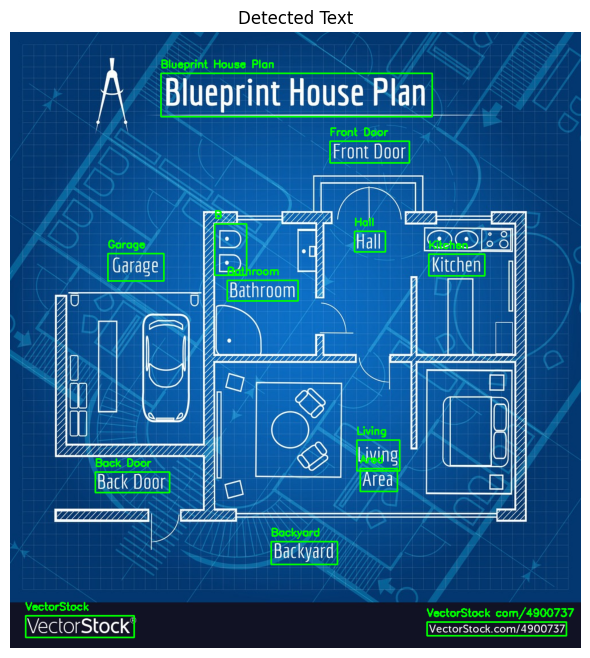


Summary of the Image:
Title/Topic: Blueprint House Plan
This image contains text related to 'Blueprint House Plan' and includes details about:
- Front Door
- B
- Hall
- Garage



In [20]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
from google.colab import files
import io

def load_image():

    uploaded = files.upload()
    if not uploaded:
        print("Error: No file selected!")
        return None

    file_name = list(uploaded.keys())[0]
    image_stream = io.BytesIO(uploaded[file_name])
    image_array = np.frombuffer(image_stream.read(), np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    return image

def preprocess_image(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    edges = cv2.Canny(thresh, 50, 150)
    return image, gray, edges

def extract_text(image):

    reader = easyocr.Reader(['en'])
    results = reader.readtext(image)

    extracted_text = []
    for (bbox, text, prob) in results:
        extracted_text.append(text)
        print(f"Detected Text: {text} (Confidence: {prob:.2f})")

    return extracted_text, results

def generate_summary(text_list):

    if not text_list:
        return "No readable text detected in the image."

    summary = "Summary of the Image:\n"


    if len(text_list[0]) > 3:
        summary += f"Title/Topic: {text_list[0]}\n"


    summary += f"This image contains text related to '{text_list[0]}' and includes details about:\n"
    for text in text_list[1:5]:
        summary += f"- {text}\n"

    return summary

def draw_detected_text(image, results):

    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    return image

def save_extracted_text(text_list):

    with open("extracted_text.txt", "w") as f:
        for line in text_list:
            f.write(line + "\n")
    print("extracted_text.txt")

def main():
    image = load_image()
    if image is None:
        return

    image, gray, edges = preprocess_image(image)

    extracted_text, results = extract_text(image)

    image_with_boxes = draw_detected_text(image, results)

    save_extracted_text(extracted_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Text")
    plt.show()

    summary = generate_summary(extracted_text)
    print("\n" + summary)

if __name__ == "__main__":
    main()
